<a href="https://colab.research.google.com/github/k22sunil/Data-Analysis-in-Python-for-Six-Sigma-Professional/blob/main/Sale_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# Load the datasets
items_df = pd.read_csv('items.csv')
restaurants_df = pd.read_csv('resturants.csv')
sales_df = pd.read_csv('sales.csv')

In [9]:
# Display the first few rows of each dataframe to understand their structure
items_df.head(), restaurants_df.head(), sales_df.head()

(   id  store_id                               name  kcal   cost
 0   1         4                     Chocolate Cake   554   6.71
 1   2         4  Breaded Fish with Vegetables Meal   772  15.09
 2   3         1                  Sweet Fruity Cake   931  29.22
 3   4         1    Amazing Steak Dinner with Rolls   763  26.42
 4   5         5                          Milk Cake   583   6.07,
    id            name
 0   1     Bob's Diner
 1   2  Beachfront Bar
 2   3     Sweet Shack
 3   4        Fou Cher
 4   5     Corner Cafe,
          date  item_id  price  item_count
 0  2019-01-01        3  29.22         2.0
 1  2019-01-01        4  26.42        22.0
 2  2019-01-01       12   4.87         7.0
 3  2019-01-01       13   4.18        12.0
 4  2019-01-01       16   3.21       136.0)

In [16]:
Merged_DataFrame_df = pd.read_csv('Merged_DataFrame.csv')

In [17]:
merged_df.head()

,date,item_id,price,item_count,store_id,name_item,kcal,cost,name_store
0,2019-01-01,3,29.22,2.0,1,Sweet Fruity Cake,931,29.22,Bob's Diner
1,2019-01-01,4,26.42,22.0,1,Amazing Steak Dinner with Rolls,763,26.42,Bob's Diner
2,2019-01-01,12,4.87,7.0,1,Fantastic Sweet Cola,478,4.87,Bob's Diner
3,2019-01-01,13,4.18,12.0,1,Sweet Frozen Soft Drink,490,4.18,Bob's Diner
4,2019-01-01,16,3.21,136.0,1,Frozen Milky Smoothy,284,3.21,Bob's Diner


In [18]:
# Convert 'date' column to datetime format
merged_df['date'] = pd.to_datetime(merged_df['date'])

In [19]:
# Group by date and sum the item_count
date_wise_sales = merged_df.groupby('date')['item_count'].sum().reset_index()

#Exploratory data analysis#
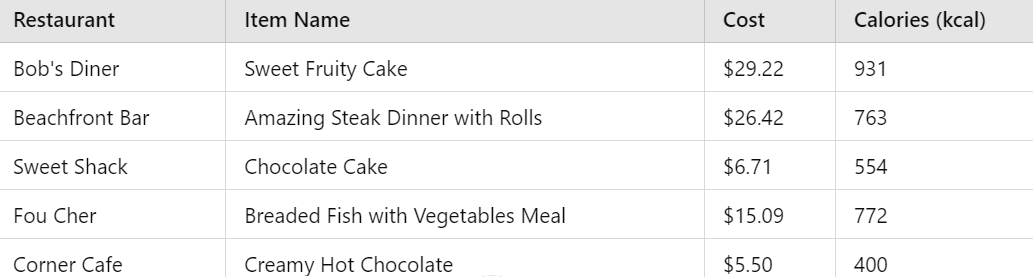

#Examine the overall date wise sales to understand the pattern##

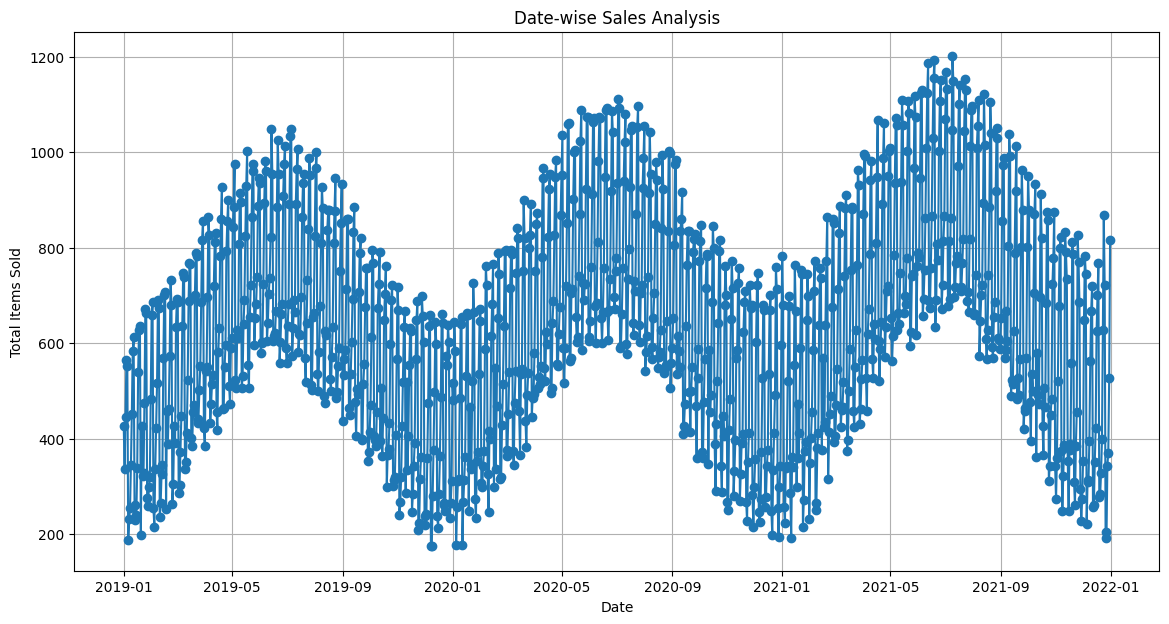

In [20]:
# Plot the date-wise sales
plt.figure(figsize=(14, 7))
plt.plot(date_wise_sales['date'], date_wise_sales['item_count'], marker='o')
plt.title('Date-wise Sales Analysis')
plt.xlabel('Date')
plt.ylabel('Total Items Sold')
plt.grid(True)
plt.show()

*The date-wise sales analysis plot shows the total items sold over time. This visualization helps us understand the overall sales trends and identify any seasonal patterns or significant fluctuations.*

#Find out how sales fluctuate across different days of the week#

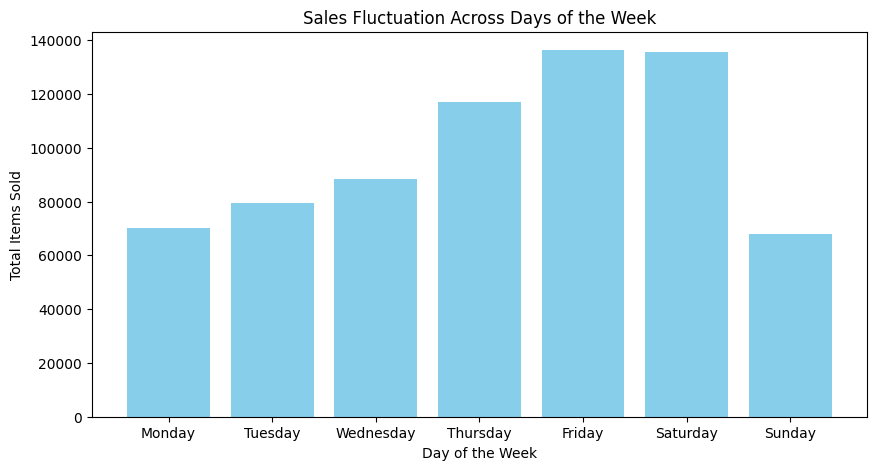

In [21]:
#Let's analyze how sales fluctuate across different days of the week to identify any patterns or trends.

# Extract day of the week from the date
merged_df['day_of_week'] = merged_df['date'].dt.day_name()

# Group by day of the week and sum the item_count
day_of_week_sales = merged_df.groupby('day_of_week')['item_count'].sum().reset_index()

# Sort days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_of_week_sales['day_of_week'] = pd.Categorical(day_of_week_sales['day_of_week'], categories=day_order, ordered=True)
day_of_week_sales = day_of_week_sales.sort_values('day_of_week')

# Plot the sales fluctuation across days of the week
plt.figure(figsize=(10, 5))
plt.bar(day_of_week_sales['day_of_week'], day_of_week_sales['item_count'], color='skyblue')
plt.title('Sales Fluctuation Across Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Items Sold')
plt.show()


*The bar chart illustrates the sales fluctuation across different days of the week. This helps us identify any specific days with higher(Friday & Saturday) or lower sales(Sunday), which can be crucial for planning and resource allocation.*

#Look for any noticeable trends in the sales data for different months of the year#

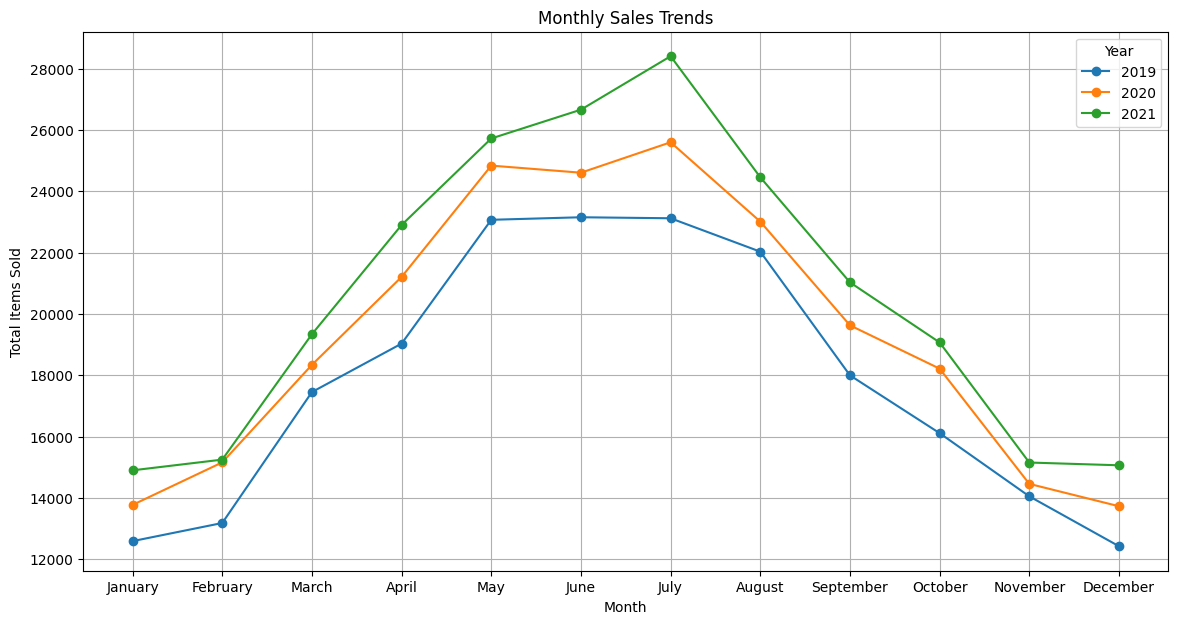

In [22]:
#Next, let's examine the sales trends across different months to identify any seasonal patterns.
# Extract month and year from the date
merged_df['month'] = merged_df['date'].dt.month_name()
merged_df['year'] = merged_df['date'].dt.year

# Group by month and sum the item_count
monthly_sales = merged_df.groupby(['year', 'month'])['item_count'].sum().reset_index()

# Sort months in chronological order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_sales['month'] = pd.Categorical(monthly_sales['month'], categories=month_order, ordered=True)
monthly_sales = monthly_sales.sort_values(['year', 'month'])

# Plot the monthly sales trends
plt.figure(figsize=(14, 7))
for year in monthly_sales['year'].unique():
    plt.plot(month_order, monthly_sales[monthly_sales['year'] == year]['item_count'], marker='o', label=year)

plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Items Sold')
plt.legend(title='Year')
plt.grid(True)
plt.show()

*The monthly sales trends plot shows the total items sold across different months over the years. This visualization helps us identify any seasonal patterns and understand how sales vary throughout the year.
Its Trend incresing from Feb onwards and July is peak and after that downtrend will start till Jan Month*

#Examine the sales distribution across different quarters averaged over the years. Identify any noticeable patterns.#

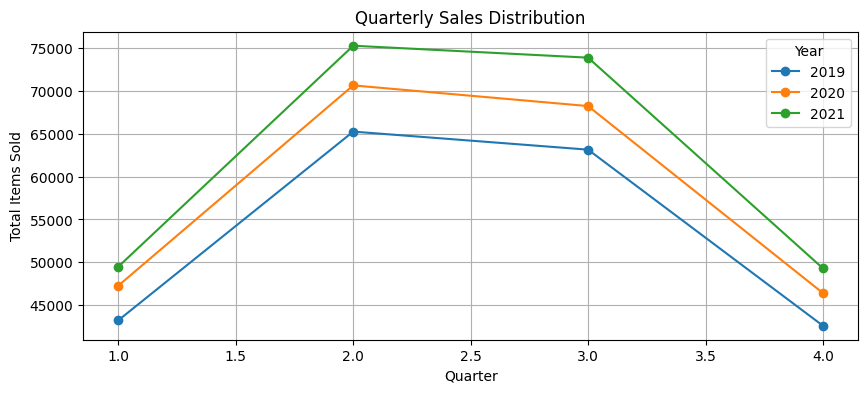

In [27]:
#Let's analyze the sales distribution across different quarters averaged over the years to identify any noticeable patterns.

# Extract quarter from the date
merged_df['quarter'] = merged_df['date'].dt.quarter

# Group by quarter and sum the item_count
quarterly_sales = merged_df.groupby(['year', 'quarter'])['item_count'].sum().reset_index()

# Plot the quarterly sales distribution
plt.figure(figsize=(10, 4))
for year in quarterly_sales['year'].unique():
    plt.plot(quarterly_sales[quarterly_sales['year'] == year]['quarter'], quarterly_sales[quarterly_sales['year'] == year]['item_count'], marker='o', label=year)

plt.title('Quarterly Sales Distribution')
plt.xlabel('Quarter')
plt.ylabel('Total Items Sold')
plt.legend(title='Year')
plt.grid(True)
plt.show()



*The quarterly sales distribution plot illustrates the total items sold across different quarters over the years. This visualization helps us identify that 4th  Qtr & 1st Qtr Low sale but peak sale on 2nd and 3rd qtr*

#Compare the performances of the different restaurants. Find out which restaurant had the most sales and look at the sales for each restaurant across different years, months, and days#


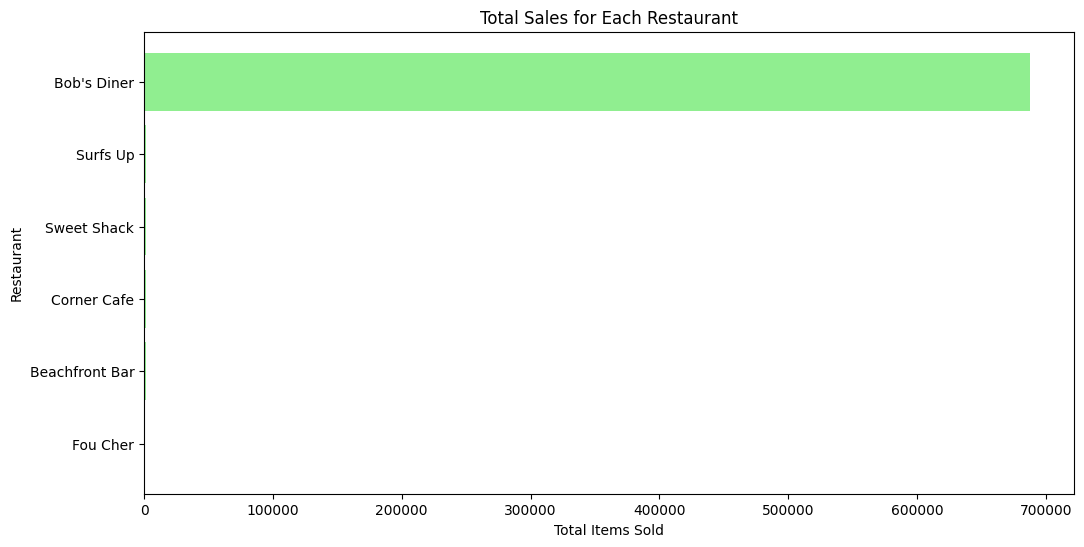

In [28]:
#let's compare the performance of different restaurants. We will find out which restaurant had the most sales and analyze the sales for each restaurant across different years, months, and days.

# Group by restaurant and sum the item_count
restaurant_sales = merged_df.groupby('name_store')['item_count'].sum().reset_index()

# Sort by item_count in descending order
restaurant_sales = restaurant_sales.sort_values('item_count', ascending=False)

# Plot the total sales for each restaurant
plt.figure(figsize=(12, 6))
plt.barh(restaurant_sales['name_store'], restaurant_sales['item_count'], color='lightgreen')
plt.title('Total Sales for Each Restaurant')
plt.xlabel('Total Items Sold')
plt.ylabel('Restaurant')
plt.gca().invert_yaxis()
plt.show()


*The bar chart displays the total sales for each restaurant, highlighting which restaurants have the highest and lowest sales volumes.Bob's diner Highest Volume*

#Identify the most popular items overall and the stores where they are being sold. Also, find out the most popular item at each store#

In [29]:
# Group by item name and sum the item_count
popular_items = merged_df.groupby('name_item')['item_count'].sum().reset_index()

# Sort by item_count in descending order
popular_items = popular_items.sort_values('item_count', ascending=False)

# Display the top 10 most popular items
popular_items.head(10)


,name_item,item_count
85,Strawberry Smoothy,236337.0
46,Frozen Milky Smoothy,103263.0
9,Amazing pork lunch,61043.0
64,Mutton Dinner,52772.0
67,Orange Juice,43874.0
22,Blue Ribbon Beef Entree,42774.0
4,Amazing Steak Dinner with Rolls,34439.0
88,Sweet Frozen Soft Drink,27490.0
83,Sea Bass with Vegetables Dinner,23839.0
90,Sweet Lamb Cake,18764.0


In [32]:
# Group by item name and sum the item_count
popular_items = merged_df.groupby('name_item')['item_count'].sum().reset_index()

# Sort by item_count in descending order
popular_items = popular_items.sort_values('item_count', ascending=False)

# Identify the stores where the top items are being sold
top_items_stores = merged_df[merged_df['name_item'].isin(popular_items.head(10)['name_item'])]

# Group by item name and store name, and sum the item_count
top_items_stores = top_items_stores.groupby(['name_item', 'name_store'])['item_count'].sum().reset_index()

# Display the top 10 most popular items and their stores
top_items_stores


,name_item,name_store,item_count
0,Amazing Steak Dinner with Rolls,Bob's Diner,34439.0
1,Amazing pork lunch,Bob's Diner,61043.0
2,Blue Ribbon Beef Entree,Bob's Diner,42774.0
3,Frozen Milky Smoothy,Bob's Diner,102990.0
4,Frozen Milky Smoothy,Corner Cafe,273.0
5,Mutton Dinner,Bob's Diner,52772.0
6,Orange Juice,Bob's Diner,43874.0
7,Sea Bass with Vegetables Dinner,Bob's Diner,23839.0
8,Strawberry Smoothy,Bob's Diner,236337.0
9,Sweet Frozen Soft Drink,Bob's Diner,27490.0


*Most Popular Items Overall and Their Stores:Amazing Steak Dinner with Rolls	Bob's Diner*

#Determine if the Store with the Highest Sales Volume is Also Making the Most Money per Day#

In [33]:
# Calculate total revenue for each store
store_revenue = merged_df.groupby('name_store')['price'].sum().reset_index()
store_revenue.columns = ['name_store', 'total_revenue']

# Calculate total sales volume for each store
store_sales_volume = merged_df.groupby('name_store')['item_count'].sum().reset_index()
store_sales_volume.columns = ['name_store', 'total_sales_volume']

# Merge the revenue and sales volume dataframes
store_performance = pd.merge(store_revenue, store_sales_volume, on='name_store')

# Display the store performance
store_performance.sort_values('total_sales_volume', ascending=False)


,name_store,total_revenue,total_sales_volume
1,Bob's Diner,321215.68,687527.0
4,Surfs Up,153111.20,1803.0
5,Sweet Shack,46262.16,1736.0
2,Corner Cafe,351728.32,1310.0
0,Beachfront Bar,23574.96,1305.0
3,Fou Cher,393409.20,1106.0


*#Store Performance (Revenue and Sales Volume): Bob's Diner*

#Identify the Most Expensive Item at Each Restaurant and Find Out Its Calorie Count#

In [34]:
# Find the most expensive item at each restaurant
most_expensive_items = merged_df.loc[merged_df.groupby('name_store')['cost'].idxmax()]

# Select relevant columns
most_expensive_items = most_expensive_items[['name_store', 'name_item', 'cost', 'kcal']]

# Display the most expensive items
most_expensive_items


,name_store,name_item,cost,kcal
68,Beachfront Bar,Sweet Vegi Soft Drink,5.70,538
0,Bob's Diner,Sweet Fruity Cake,29.22,931
58,Corner Cafe,Pike Lunch,26.37,653
82,Fou Cher,Blue Ribbon Fruity Vegi Lunch,53.98,881
8,Surfs Up,Steak Meal,26.21,607
79,Sweet Shack,Blue Ribbon Frozen Milky Cake,7.70,636


Summary of Most Expensive Items:Bob's Diner	Sweet Fruity Cake	29.22	931




#Forecasting using machine learning algorithms:#

In [39]:
#Feature Engineering: Generate necessary features like day of the week, quarter, month, year, etc.

# Generate features from the date
merged_df['day_of_week'] = merged_df['date'].dt.dayofweek
merged_df['quarter'] = merged_df['date'].dt.quarter
merged_df['month'] = merged_df['date'].dt.month
merged_df['year'] = merged_df['date'].dt.year
merged_df['day_of_month'] = merged_df['date'].dt.day

# Prepare the target variable
merged_df['total_sales'] = merged_df['item_count'] * merged_df['price']



**build three models: Linear Regression, Random Forest, and XGBoost, and evaluate their performance using the RMSE metric.**

In [38]:
# Debugging: Print the date range of the dataset
print("Date range in dataset:", merged_df['date'].min(), "to", merged_df['date'].max())

# Ensure the data splitting step is correct
train_data = merged_df[merged_df['date'] < '2023-01-01']
test_data = merged_df[merged_df['date'] >= '2023-01-01']

# Print the shape of the split datasets
print("Training data shape:", train_data.shape)
print("Testing data shape:", test_data.shape)

# Print a few rows to check the data
print("Training data sample:")
print(train_data.head())

print("Testing data sample:")
print(test_data.head())

# Check the shapes of the features and target variables
X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)



Date range in dataset: 2019-01-01 00:00:00 to 2021-12-31 00:00:00
Training data shape: (109600, 15)
Testing data shape: (0, 15)
Training data sample:
        date  item_id  price  item_count  store_id  \
0 2019-01-01        3  29.22         2.0         1   
1 2019-01-01        4  26.42        22.0         1   
2 2019-01-01       12   4.87         7.0         1   
3 2019-01-01       13   4.18        12.0         1   
4 2019-01-01       16   3.21       136.0         1   

                         name_item  kcal   cost   name_store  day_of_week  \
0                Sweet Fruity Cake   931  29.22  Bob's Diner            1   
1  Amazing Steak Dinner with Rolls   763  26.42  Bob's Diner            1   
2             Fantastic Sweet Cola   478   4.87  Bob's Diner            1   
3          Sweet Frozen Soft Drink   490   4.18  Bob's Diner            1   
4             Frozen Milky Smoothy   284   3.21  Bob's Diner            1   

   month  year  quarter  day_of_month  total_sales  
0      1 

In [40]:
# Use the last six months as the testing data
cutoff_date = merged_df['date'].max() - pd.DateOffset(months=6)
train_data = merged_df[merged_df['date'] < cutoff_date]
test_data = merged_df[merged_df['date'] >= cutoff_date]

X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]


In [41]:
#Train and evaluate Linear Regression, Random Forest, and XGBoost models, and compute RMSE.
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
xgb_model = XGBRegressor(n_estimators=100, random_state=42)

# Fit and predict with Linear Regression
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_predictions))

# Fit and predict with Random Forest
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))

# Fit and predict with XGBoost
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_predictions))

print(f"Linear Regression RMSE: {lr_rmse}")
print(f"Random Forest RMSE: {rf_rmse}")
print(f"XGBoost RMSE: {xgb_rmse}")


Linear Regression RMSE: 217.92165461521935
Random Forest RMSE: 70.27007113035212
XGBoost RMSE: 80.78752933691798


**Use the best-performing model to forecast for the next year.**

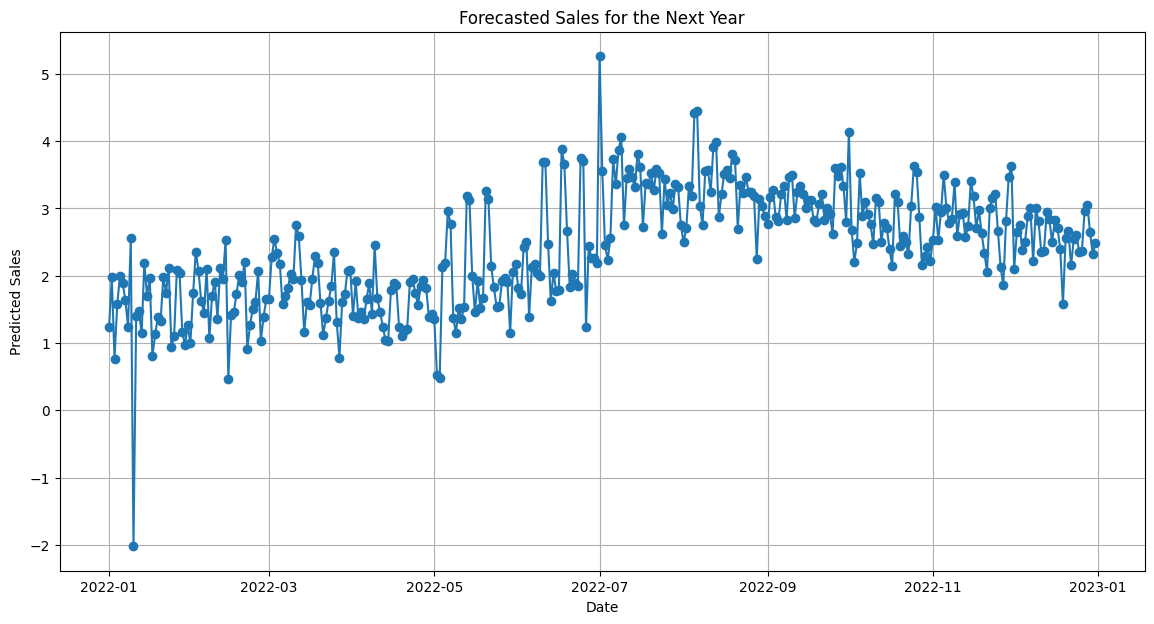

In [42]:
# Create a dataframe for future dates (next year)
future_dates = pd.date_range(start=merged_df['date'].max() + pd.Timedelta(days=1), periods=365, freq='D')
future_data = pd.DataFrame({'date': future_dates})

# Generate features for future dates
future_data['day_of_week'] = future_data['date'].dt.dayofweek
future_data['quarter'] = future_data['date'].dt.quarter
future_data['month'] = future_data['date'].dt.month
future_data['year'] = future_data['date'].dt.year
future_data['day_of_month'] = future_data['date'].dt.day

# Assume predictions for an average store and item (use mean values for store_id and item_id)
future_data['store_id'] = X_train['store_id'].mean()
future_data['item_id'] = X_train['item_id'].mean()

# Predict future sales using the best model (assuming XGBoost as an example)
future_features = future_data[features]
future_predictions = xgb_model.predict(future_features)

# Add predictions to the future_data dataframe
future_data['predicted_sales'] = future_predictions

# Plot the forecasted sales
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 7))
plt.plot(future_data['date'], future_data['predicted_sales'], marker='o')
plt.title('Forecasted Sales for the Next Year')
plt.xlabel('Date')
plt.ylabel('Predicted Sales')
plt.grid(True)
plt.show()
